# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [215]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob

files = glob.glob("states*.csv")

df_list = []
for filename in files:
    data = pd.read_csv(filename)
    df_list.append(data)

df = pd.concat(df_list)

print(df.head())

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific       Income            GenderPop  
0  3.25%   0.04%  $59,125.27       510388M_543273F  
1  1.25%   0.05%  $46,296.81     2322409M_2455167F  
2  1.02%   0.04%  $51,805.41       423477M_419713F  
3  1.41%   0.04%  $47,328.08     3167756M_3331859F  
4  3.67%   0.07%  $55,874.52   13171316M_13367298F  


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [216]:
print (df.dtypes)

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [217]:
#store the columns with percentage sign in a list
percentage_columns = ['Hispanic' , 'White' , 'Black' , 'Native' , 'Asian' , 'Pacific']
percentage_columns_df = df[percentage_columns]

#iterate through the columns and remove the percebtage sign and change the data type of the column to float
for column_name in percentage_columns_df:
    df[column_name] = df[column_name].replace('[\%,]', '', regex=True)
    df[column_name] = pd.to_numeric(df[column_name])


#the same process for the income column with the dollar sign
df["Income"] = df["Income"].replace('[\$,]', '', regex=True)
df['Income'] = pd.to_numeric(df['Income'])


#the gender pop colum contains both female and male population in on string
#first the string is halved and stored in female and male population columns
name_split = df.GenderPop.str.split("_")
df['male_population'] = name_split.str.get(0)
df['female_population'] = name_split.str.get(1)


#the M and F at the end of the strings are removed and replaced with empty chartacter and columns are 
#converted to numeric type afterwards
df['male_population'] = df['male_population'].replace('[^0-9]', "", regex=True)
df['female_population'] = df['female_population'].replace('[^0-9]', "", regex=True)
df['male_population'] = pd.to_numeric(df['male_population']).astype('Int64')
df['female_population'] = pd.to_numeric(df['female_population']).astype('Int64')


#finally the genderpop colum is dropped from the dataframe
df.drop(columns='GenderPop', inplace=False)


print (df.head())
print (df.dtypes)

   Unnamed: 0           State  TotalPop  Hispanic  White  Black  Native  \
0           0    Rhode Island   1053661     13.36  74.33   5.68    0.35   
1           1  South Carolina   4777576      5.06  62.89  28.75    0.29   
2           2    South Dakota    843190      3.24  82.50   1.42    9.42   
3           3       Tennessee   6499615      4.72  73.49  18.28    0.23   
4           4           Texas  26538614     38.05  44.69  11.65    0.26   

   Asian  Pacific    Income            GenderPop  male_population  \
0   3.25     0.04  59125.27      510388M_543273F           510388   
1   1.25     0.05  46296.81    2322409M_2455167F          2322409   
2   1.02     0.04  51805.41      423477M_419713F           423477   
3   1.41     0.04  47328.08    3167756M_3331859F          3167756   
4   3.67     0.07  55874.52  13171316M_13367298F         13171316   

   female_population  
0             543273  
1            2455167  
2             419713  
3            3331859  
4           1336729

8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

In [218]:
# the first colummn is dropped and State is considered as the index
df = df.drop('Unnamed: 0', axis=1, errors='ignore')
if 'States' in df.columns:
    df = df.set_index('States')
print (df.head())

            State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific  \
0    Rhode Island   1053661     13.36  74.33   5.68    0.35   3.25     0.04   
1  South Carolina   4777576      5.06  62.89  28.75    0.29   1.25     0.05   
2    South Dakota    843190      3.24  82.50   1.42    9.42   1.02     0.04   
3       Tennessee   6499615      4.72  73.49  18.28    0.23   1.41     0.04   
4           Texas  26538614     38.05  44.69  11.65    0.26   3.67     0.07   

     Income            GenderPop  male_population  female_population  
0  59125.27      510388M_543273F           510388             543273  
1  46296.81    2322409M_2455167F          2322409            2455167  
2  51805.41      423477M_419713F           423477             419713  
3  47328.08    3167756M_3331859F          3167756            3331859  
4  55874.52  13171316M_13367298F         13171316           13367298  


   index           State  TotalPop  Hispanic  White  Black  Native  Asian  \
0      0    Rhode Island   1053661     13.36  74.33   5.68    0.35   3.25   
1      1  South Carolina   4777576      5.06  62.89  28.75    0.29   1.25   
2      2    South Dakota    843190      3.24  82.50   1.42    9.42   1.02   
3      3       Tennessee   6499615      4.72  73.49  18.28    0.23   1.41   
4      4           Texas  26538614     38.05  44.69  11.65    0.26   3.67   

   Pacific    Income            GenderPop  male_population  female_population  
0     0.04  59125.27      510388M_543273F           510388             543273  
1     0.05  46296.81    2322409M_2455167F          2322409            2455167  
2     0.04  51805.41      423477M_419713F           423477             419713  
3     0.04  47328.08    3167756M_3331859F          3167756            3331859  
4     0.07  55874.52  13171316M_13367298F         13171316           13367298  


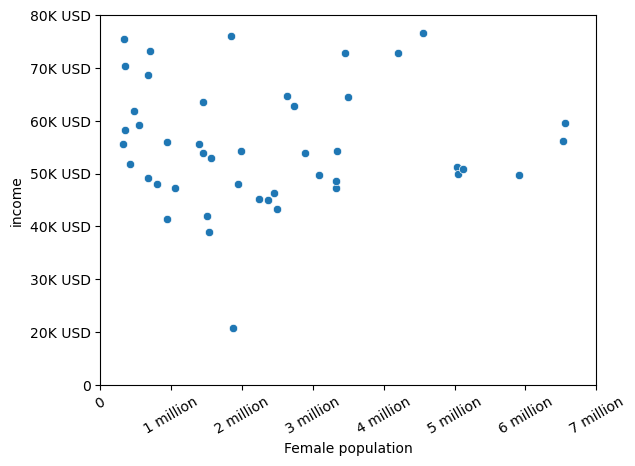

<Figure size 640x480 with 0 Axes>

In [221]:
df = df.drop_duplicates()

print (df.head())


female = df.female_population[df.female_population <= 0.75*(10**7)]

fig ,ax = plt.subplots()

sns.scatterplot(x=female , y='Income' , data=df)

default_xticks = ax.get_xticks()
ax.set_xticks(default_xticks)
ax.set_xticklabels(['0', '1 million', '2 million', '3 million', '4 million', '5 million', '6 million' , '7 million'] , rotation=30)

default_yticks = ax.get_yticks()
ax.set_yticks(default_yticks)
ax.set_yticklabels(['0', '20K USD', '30K USD', '40K USD', '50K USD', '60K USD', '70K USD' , '80K USD'])

# Set axis labels
ax.set_xlabel('Female population')
ax.set_ylabel('income')


plt.show()
plt.clf()


9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [ ]:
df['female_population'] = df['female_population'].fillna(df['TotalPop'] - df['male_population'] )
print (df.isna().sum())

State                0
TotalPop             0
Hispanic             0
White                0
Black                0
Native               0
Asian                0
Pacific              5
Income               0
GenderPop            0
male_population      0
female_population    0
dtype: int64


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

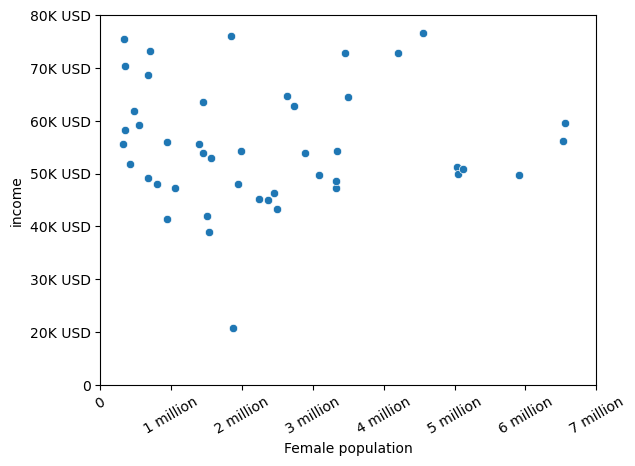

<Figure size 640x480 with 0 Axes>

In [276]:
fig ,ax = plt.subplots()

sns.scatterplot(x=female , y='Income' , data=df)

default_xticks = ax.get_xticks()
ax.set_xticks(default_xticks)
ax.set_xticklabels(['0', '1 million', '2 million', '3 million', '4 million', '5 million', '6 million' , '7 million'] , rotation=30)

default_yticks = ax.get_yticks()
ax.set_yticks(default_yticks)
ax.set_yticklabels(['0', '20K USD', '30K USD', '40K USD', '50K USD', '60K USD', '70K USD' , '80K USD'])

# Set axis labels
ax.set_xlabel('Female population')
ax.set_ylabel('income')


plt.show()
plt.clf()


## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [287]:
df = df.drop_duplicates()
print (df.head())
df_melted = pd.melt(df, id_vars=['State', 'TotalPop'], 
                    value_vars=['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'],
                    var_name='Ethnicity', value_name='Percentage')

#fig, axes = plt.subplots(26, 2, figsize=(20, 250))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each state's bar plot in the corresponding subplot
# for i, state in enumerate(df['State']):
#     current_state = df_melted[df_melted['State'] == state]
#     sns.barplot(ax=axes[i], x=current_state['Ethnicity'], y=current_state['Percentage'])
#     axes[i].set_title(state)
#     axes[i].set_xticklabels(current_state['Ethnicity'], rotation=45)

# Hide any remaining empty subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])


   index           State  TotalPop  Hispanic  White  Black  Native  Asian  \
0      0    Rhode Island   1053661     13.36  74.33   5.68    0.35   3.25   
1      1  South Carolina   4777576      5.06  62.89  28.75    0.29   1.25   
2      2    South Dakota    843190      3.24  82.50   1.42    9.42   1.02   
3      3       Tennessee   6499615      4.72  73.49  18.28    0.23   1.41   
4      4           Texas  26538614     38.05  44.69  11.65    0.26   3.67   

   Pacific    Income            GenderPop  male_population  female_population  
0     0.04  59125.27      510388M_543273F           510388             543273  
1     0.05  46296.81    2322409M_2455167F          2322409            2455167  
2     0.04  51805.41      423477M_419713F           423477             419713  
3     0.04  47328.08    3167756M_3331859F          3167756            3331859  
4     0.07  55874.52  13171316M_13367298F         13171316           13367298  


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

              State  TotalPop Ethnicity  Percentage
0      Rhode Island   1053661  Hispanic       13.36
1    South Carolina   4777576  Hispanic        5.06
2      South Dakota    843190  Hispanic        3.24
3         Tennessee   6499615  Hispanic        4.72
4             Texas  26538614  Hispanic       38.05
..              ...       ...       ...         ...
301         Alabama   4830620   Pacific        0.03
302          Alaska    733375   Pacific        1.06
303         Arizona   6641928   Pacific        0.17
304        Arkansas   2958208   Pacific        0.15
305      California  38421464   Pacific        0.35

[306 rows x 4 columns]


/var/folders/m9/02syqrp93zg6fyn_7w05v0gh0000gn/T/ipykernel_29257/4110646061.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(current_ethnicity_sorted['State'], rotation=90)
/var/folders/m9/02syqrp93zg6fyn_7w05v0gh0000gn/T/ipykernel_29257/4110646061.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(current_ethnicity_sorted['State'], rotation=90)
/var/folders/m9/02syqrp93zg6fyn_7w05v0gh0000gn/T/ipykernel_29257/4110646061.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(current_ethnicity_sorted['State'], rotation=90)
/var/folders/m9/02syqrp93zg6fyn_7w05v0gh0000gn/T/ipykernel_29257/4110646061.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(current_ethnicity_sorted['State'], rotation=90)
/var/folders/m9/02syqrp93zg6fyn_7w05v0gh0000gn/T/ipykernel_29257/4110646

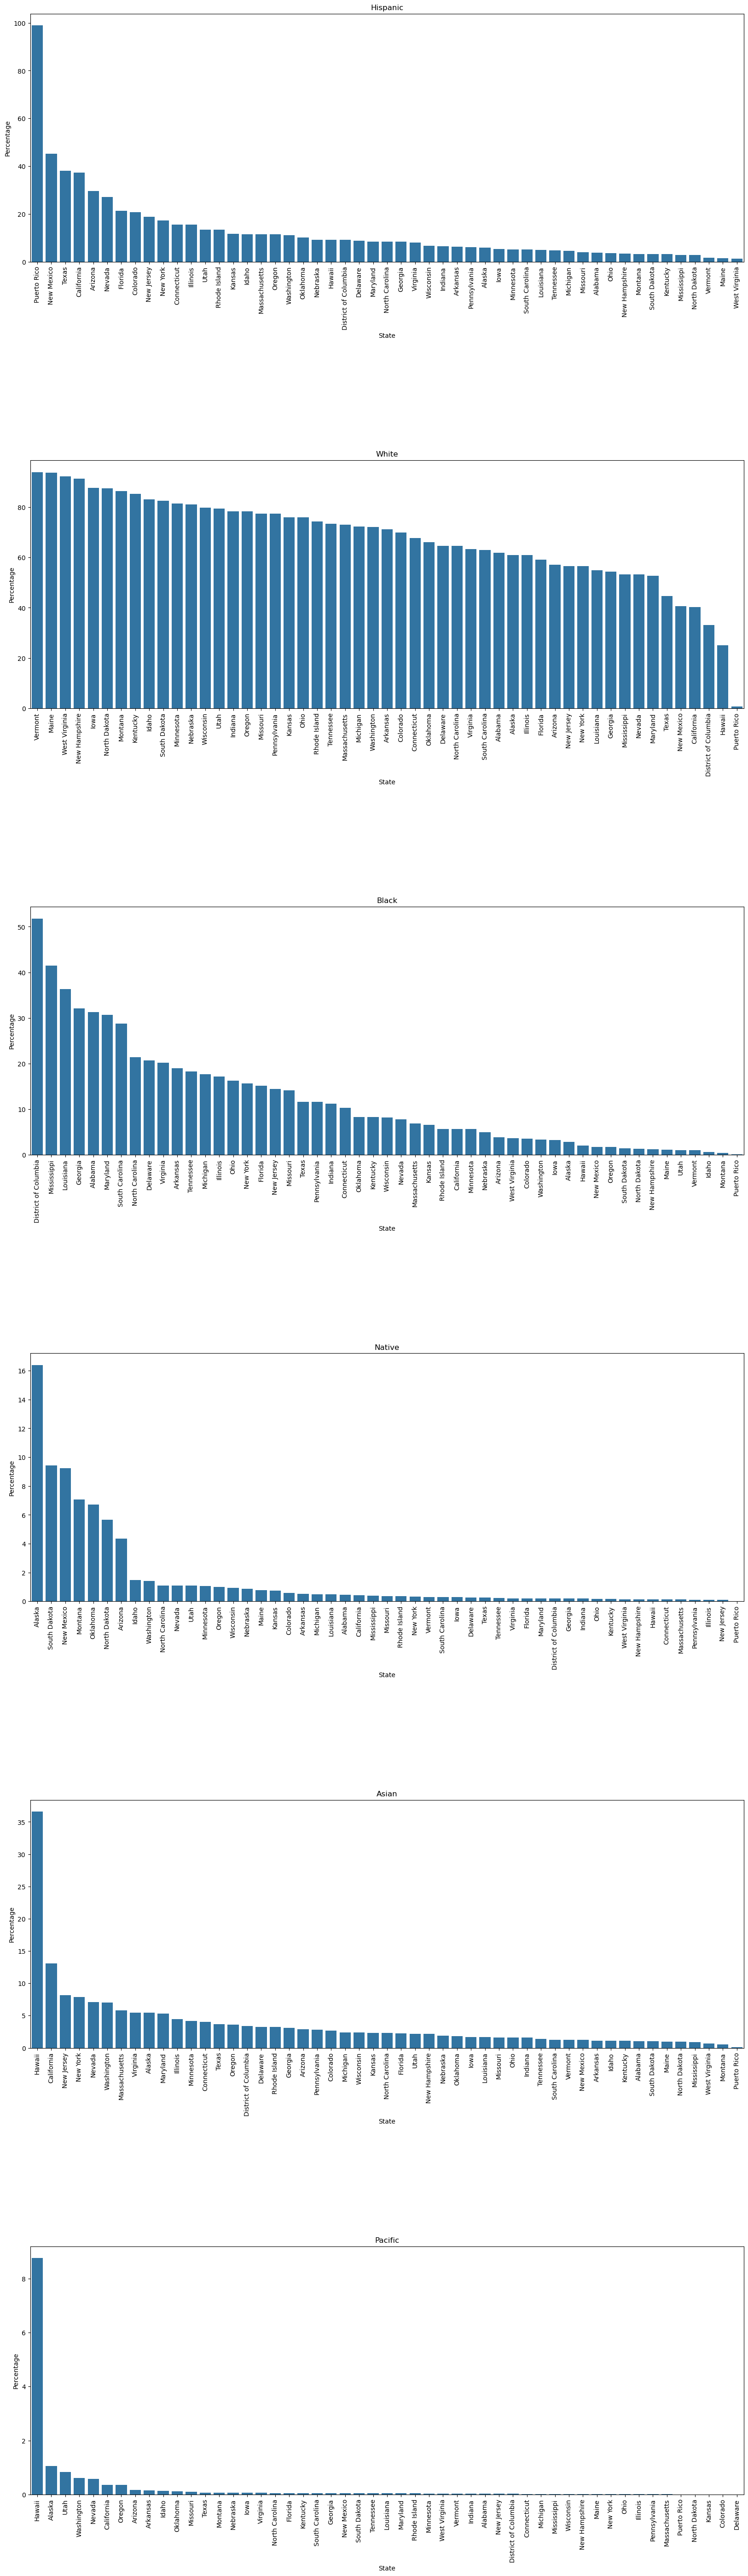

In [310]:
# hispanics = df_melted[df_melted['Ethnicity'] == 'Hispanic']
# fig, ax = plt.subplots(figsize = (20,10))
# sns.barplot(x = 'State' , y = 'Percentage' , data=hispanics)
# ax.set_title('hispanics')
# ax.set_xticklabels(df_melted['State'], rotation=90)

print (df_melted)

fig, axes = plt.subplots(6, 1, figsize=(20, 70))

plt.subplots_adjust(hspace=0.8)

# Flatten the axes array for easy iteration
axes = axes.flatten()
ethnicity_list = list(df_melted['Ethnicity'].unique())

for i in range(len(ethnicity_list)):
    current_ethnicity = df_melted[df_melted['Ethnicity'] == ethnicity_list[i]]
    current_ethnicity_sorted = current_ethnicity.sort_values(by='Percentage', ascending=False)
    sns.barplot(ax=axes[i], x=current_ethnicity_sorted['State'], y=current_ethnicity_sorted['Percentage'])
    axes[i].set_title(ethnicity_list[i])
    axes[i].set_xticklabels(current_ethnicity_sorted['State'], rotation=90)






# fig, axes = plt.subplots(6, 1, figsize=(20, 10))

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Plot each state's bar plot in the corresponding subplot
# for i, state in enumerate(df['State']):
#     current_state = df_melted[df_melted['State'] == state]
#     sns.barplot(ax=axes[i], x=current_state['Ethnicity'], y=current_state['Percentage'])
#     axes[i].set_title(state)
#     axes[i].set_xticklabels(current_state['Ethnicity'], rotation=45)

# # Hide any remaining empty subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.